In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [4]:
# Load and preprocess images from directories
def load_images_from_folder(folder_path, image_size=(128, 128)):
    images = []
    labels = []
    class_names = os.listdir(folder_path)
   
    for label, class_name in enumerate(class_names):
        class_path = os.path.join(folder_path, class_name)
        for filename in os.listdir(class_path):
            img = load_img(os.path.join(class_path, filename), target_size=image_size)
            img_array = img_to_array(img) / 255.0  # Normalize
            images.append(img_array)
            labels.append(label)
   
    return np.array(images), np.array(labels), class_names

In [6]:
# Path to your dataset folder (structured as folder/class_name/image.jpg)
dataset_path = r'D:\Neeraj\SEM 7\DLE LAB\Bean_Dataset\Bean_Dataset'

# Load data
X, y, class_names = load_images_from_folder(dataset_path)
print(f"Loaded {X.shape[0]} images with shape {X.shape[1:]}.")

Loaded 990 images with shape (128, 128, 3).


In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to categorical (one-hot encoding)
num_classes = len(class_names)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [10]:
# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - accuracy: 0.2936 - loss: 2.4240 - val_accuracy: 0.4277 - val_loss: 1.0417
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.4493 - loss: 1.0515 - val_accuracy: 0.4340 - val_loss: 0.9792
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.5899 - loss: 0.8814 - val_accuracy: 0.6478 - val_loss: 0.8326
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - accuracy: 0.6663 - loss: 0.7769 - val_accuracy: 0.6226 - val_loss: 0.8156
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.6879 - loss: 0.6806 - val_accuracy: 0.7547 - val_loss: 0.6192
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.7933 - loss: 0.5603 - val_accuracy: 0.7610 - val_loss: 0.5768
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.8485 - loss: 0.4107 - val_accuracy: 0.7547 - val_loss: 0.5707
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - accuracy: 0.8571 - loss: 0.3698 - val_accuracy: 0.

In [16]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6609 - loss: 1.0742
Test Accuracy: 67.68%


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Classification Report:
                   precision    recall  f1-score   support

angular_leaf_spot       0.62      0.73      0.67        63
        bean_rust       0.74      0.39      0.51        66
          healthy       0.70      0.90      0.78        69

         accuracy                           0.68       198
        macro avg       0.69      0.67      0.66       198
     weighted avg       0.69      0.68      0.66       198



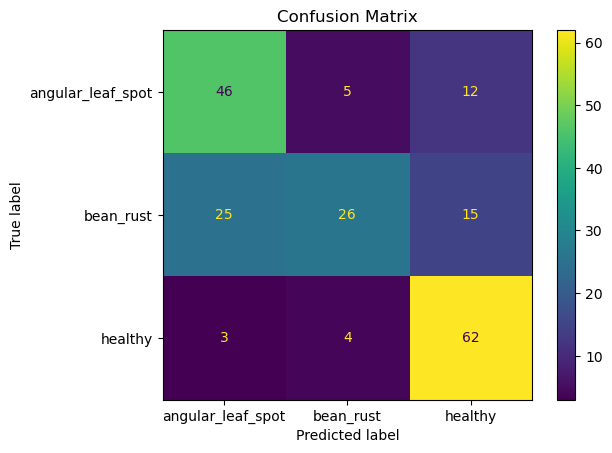

In [24]:
# Predictions and performance metrics
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

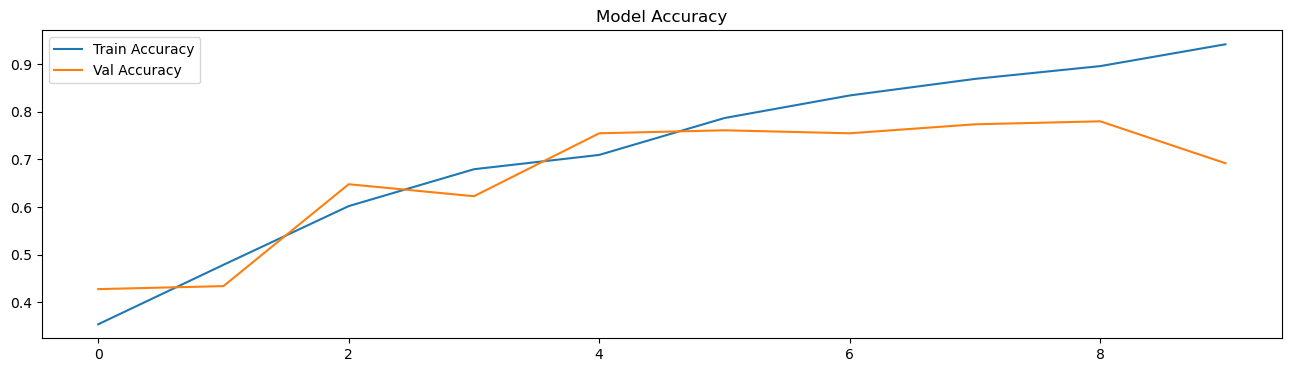

In [26]:
plt.figure(figsize=(16,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

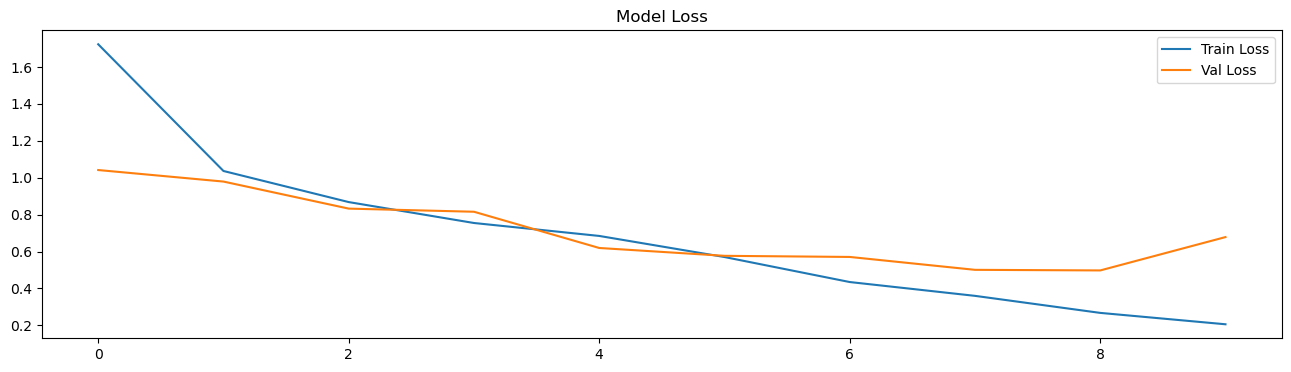

In [28]:
plt.figure(figsize=(16,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()
plt.show()